In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('/content/ml model.zip')

In [ ]:
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             82 non-null     int64 
 1   weight          82 non-null     int64 
 2   blood_pressure  82 non-null     object
 3   glucose_level   82 non-null     int64 
 4   insulin_level   82 non-null     int64 
 5   smoking_habit   82 non-null     object
 6   symptom_1       82 non-null     object
 7   symptom_2       82 non-null     object
 8   symptom_3       82 non-null     object
 9   disease         82 non-null     object
dtypes: int64(4), object(6)
memory usage: 6.5+ KB


,age,weight,glucose_level,insulin_level
count,82.000000,82.000000,82.000000,82.000000
mean,48.695122,74.390244,136.536585,27.402439
std,13.460219,7.468049,35.552151,10.708091
min,25.000000,55.000000,90.000000,10.000000
25%,37.250000,69.000000,105.000000,19.000000
50%,48.000000,75.500000,122.500000,24.000000
75%,60.000000,80.000000,170.000000,37.750000
max,72.000000,87.000000,200.000000,50.000000


In [ ]:
df[['systolic_bp', 'diastolic_bp']] = df['blood_pressure'].str.split('/', expand=True).astype(int)
df.drop('blood_pressure', axis=1, inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['smoking_habit'] = le.fit_transform(df['smoking_habit'])
df['symptom_1'] = le.fit_transform(df['symptom_1'])
df['symptom_2'] = le.fit_transform(df['symptom_2'])
df['symptom_3'] = le.fit_transform(df['symptom_3'])


In [ ]:
#select features
features = [
    'age', 'weight', 'glucose_level', 'insulin_level',
    'systolic_bp', 'diastolic_bp', 'smoking_habit'
]

X = df[features]


In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
#K-means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)



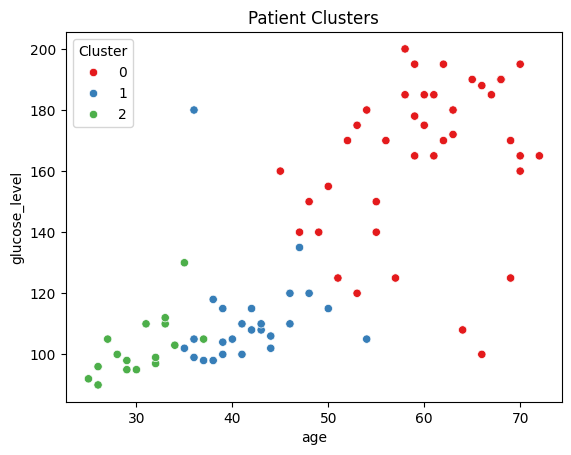

In [ ]:
#visualize clusters
import seaborn as sns
sns.scatterplot(
    x=df['age'],
    y=df['glucose_level'],
    hue=df['Cluster'],
    palette='Set1'
)
plt.title("Patient Clusters")
plt.show()


In [ ]:
#cluster analysis
df.groupby('Cluster')[features].mean()


,age,weight,glucose_level,insulin_level,systolic_bp,diastolic_bp,smoking_habit
Cluster,,,,,,,
0,60.04878,79.926829,165.146341,36.439024,142.04878,90.634146,0.97561
1,41.76000,72.440000,111.520000,19.960000,128.32000,81.280000,0.20000
2,30.43750,63.250000,102.312500,15.875000,118.25000,76.375000,0.00000


In [ ]:
#checking risk level
risk_map = {
    0: "Low Risk",
    1: "Medium Risk",
    2: "High Risk"
}

df['Risk_Level'] = df['Cluster'].map(risk_map)


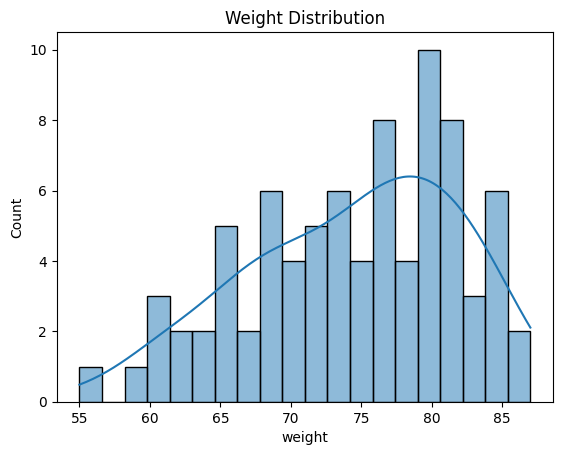

In [ ]:
#weight distri
sns.histplot(df['weight'], bins=20, kde=True)
plt.title("Weight Distribution")
plt.show()


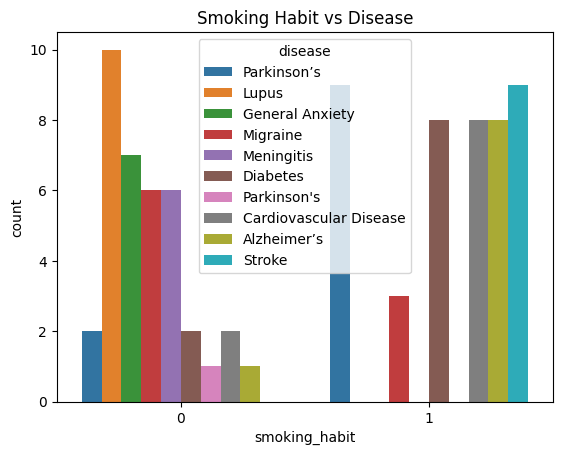

In [ ]:
#smoking habit vs diseases
sns.countplot(x='smoking_habit', hue='disease', data=df)
plt.title("Smoking Habit vs Disease")
plt.show()


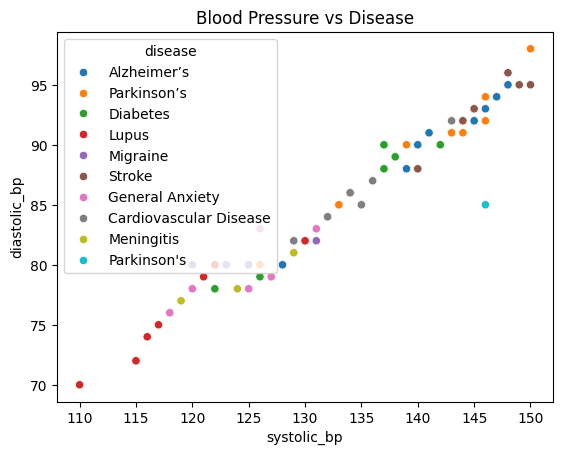

In [ ]:
#blood pressure analysis
sns.scatterplot(
    x='systolic_bp',
    y='diastolic_bp',
    hue='disease',
    data=df
)
plt.title("Blood Pressure vs Disease")
plt.show()


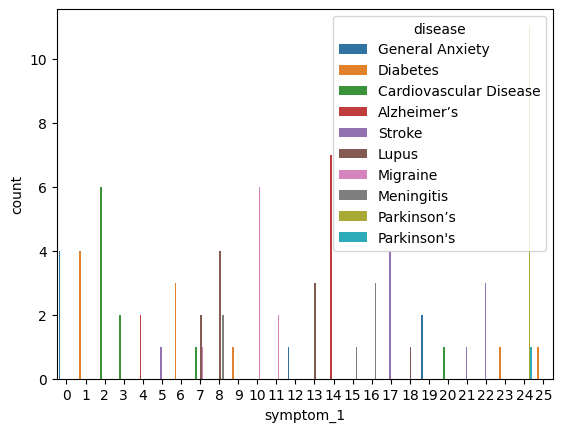

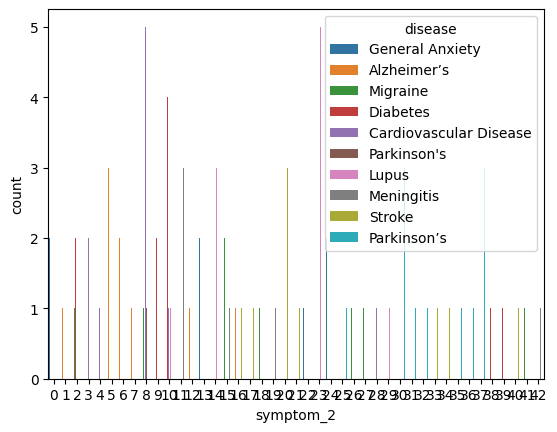

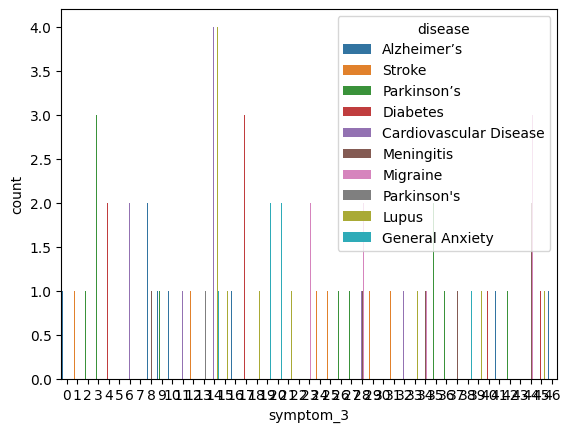

In [ ]:
sns.countplot(x='symptom_1', hue='disease', data=df)
plt.show()

sns.countplot(x='symptom_2', hue='disease', data=df)
plt.show()

sns.countplot(x='symptom_3', hue='disease', data=df)
plt.show()


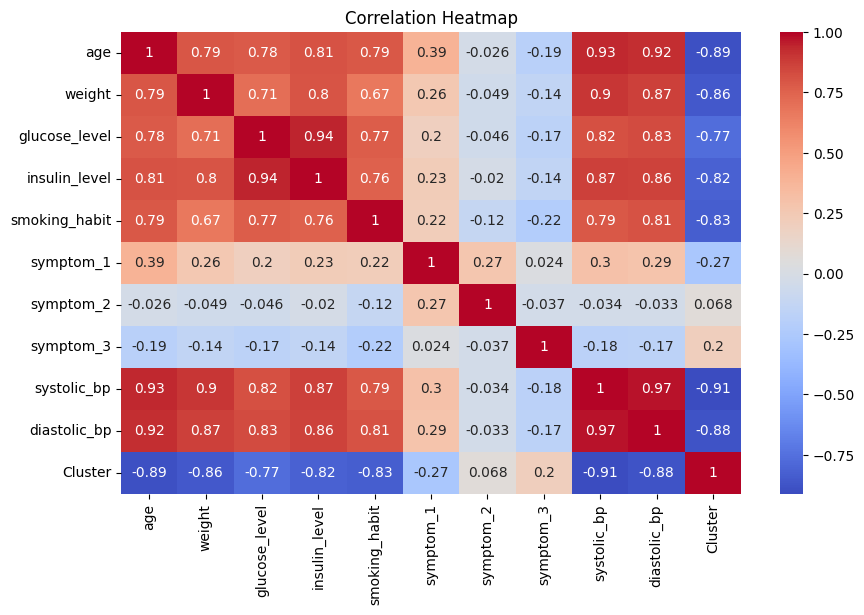

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop(['disease', 'Risk_Level'], axis=1)
y = df['disease']

In [ ]:
#Encode Categorical Columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = ['smoking_habit', 'symptom_1', 'symptom_2', 'symptom_3']
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])


In [ ]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)


In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


In [ ]:
#model evaluation
from sklearn.metrics import accuracy_score

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.29411764705882354
Random Forest Accuracy: 0.5294117647058824


In [ ]:
#classification
from sklearn.metrics import classification_report

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Report:
                         precision    recall  f1-score   support

           Alzheimer’s       0.00      0.00      0.00         1
Cardiovascular Disease       1.00      1.00      1.00         2
              Diabetes       0.00      0.00      0.00         3
       General Anxiety       0.33      0.50      0.40         2
                 Lupus       0.00      0.00      0.00         1
            Meningitis       0.00      0.00      0.00         0
              Migraine       0.00      0.00      0.00         2
           Parkinson's       0.00      0.00      0.00         1
           Parkinson’s       1.00      0.50      0.67         4
                Stroke       0.00      0.00      0.00         1

              accuracy                           0.29        17
             macro avg       0.23      0.20      0.21        17
          weighted avg       0.39      0.29      0.32        17

Random Forest Report:
                         precision    recall  f1-s

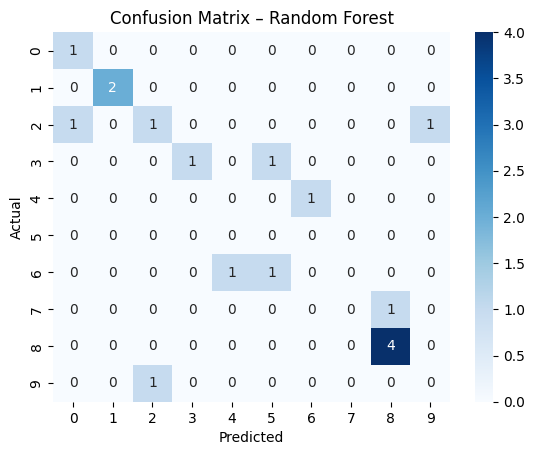

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


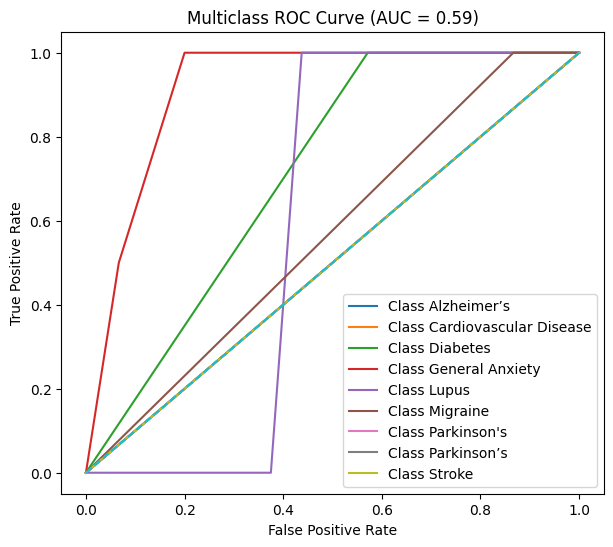

In [ ]:
#ROC curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_prob = rf_model.predict_proba(X_test)
fpr = {}
tpr = {}
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
auc = roc_auc_score(
    y_test_bin,
    y_prob,
    multi_class='ovr',
    average='macro'
)

plt.figure(figsize=(7,6))

for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f"Class {classes[i]}")

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Multiclass ROC Curve (AUC = {auc:.2f})")
plt.legend()
plt.show()



In [ ]:
#Diseases prediction of new patient
feature_names = X.columns.tolist()


In [ ]:
new_patient = pd.DataFrame([{
    'age': 45,
    'weight': 70,
    'glucose_level': 160,
    'insulin_level': 85,
    'systolic_bp': 140,
    'diastolic_bp': 90,
    'smoking_habit': 1,
    'symptom_1': 1,
    'symptom_2': 0,
    'symptom_3': 1,
    'Cluster': 0   # REQUIRED if used during training
}])


In [ ]:
new_patient = new_patient[feature_names]


In [ ]:
new_patient_scaled = scaler.transform(new_patient)
prediction = rf_model.predict(new_patient_scaled)

print("Disease Prediction:", "Yes" if prediction[0] == 1 else "NO")


Disease Prediction: NO
